<a href="https://colab.research.google.com/github/Aadith-Sivakumar/Telecom-Churn-Dataset-Analysis/blob/main/Copy_of_Telephone_Churn_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
url='https://drive.google.com/file/d/19FfTrGFiIb-Aw-8gNMiggCwLS_65EtpD/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df.head() # Getting the first five rows

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

There are no null values in any of the coloumn 

In [ ]:
df[df.duplicated()]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


There are no duplicate values

**Churn**

In [ ]:
# Getting the total number of customers who have churned
churn_stats = df['Churn'].value_counts()
churn_stats

False    2850
True      483
Name: Churn, dtype: int64

Text(0.5, 1.0, 'percenatge of total churned and unchurned customers ')

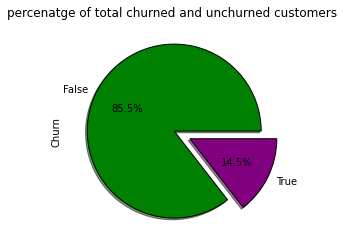

In [ ]:
# calculating percentage of total churned and unchured customers
churn_stats.plot(kind = 'pie',autopct = '%1.1f%%',wedgeprops = {'edgecolor':'black'},colors = ['green','purple'],explode = [0,0.2],shadow = True )
plt.title("percenatge of total churned and unchurned customers ")

14.5% of the customers have churned while 85.5% have not churned 

**State**

In [ ]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
df['State'].nunique()

51

In [ ]:
statewise_churn = df.groupby('State')['Churn'].value_counts().unstack()
statewise_churn

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


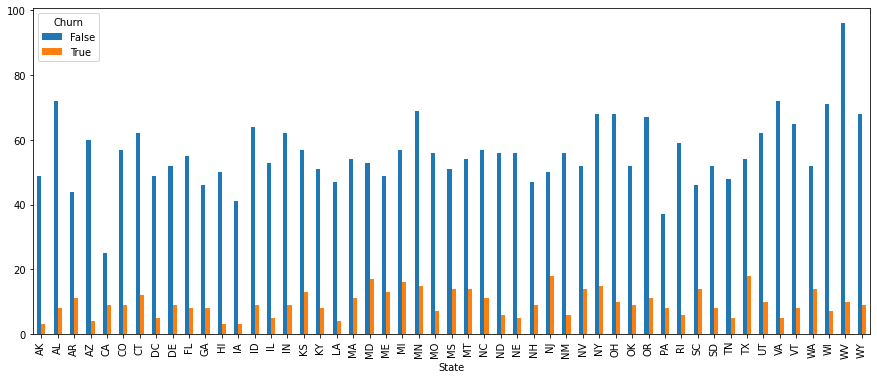

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
statewise_churn.plot(kind = 'bar')


In [ ]:
statewise_churn['Percentage_churning_in_state'] = statewise_churn[True]/(statewise_churn[False] + statewise_churn[True])*100

In [ ]:
statewise_churn

Churn,False,True,Percentage_churning_in_state,Percentage_of_statewise_churn
State,,,,
AK,49,3,5.769231,5.769231
AL,72,8,10.000000,10.000000
AR,44,11,20.000000,20.000000
AZ,60,4,6.250000,6.250000
CA,25,9,26.470588,26.470588
CO,57,9,13.636364,13.636364
CT,62,12,16.216216,16.216216
DC,49,5,9.259259,9.259259
DE,52,9,14.754098,14.754098


In [ ]:
statewise_churn.sort_values(by = 'Percentage_churning_in_state',ascending = False,inplace=True)

In [ ]:
# to find the top three states having highest churning rate
statewise_churn.head(3)

Churn,False,True,Percentage_churning_in_state,Percentage_of_statewise_churn
State,,,,
NJ,50,18,26.470588,26.470588
CA,25,9,26.470588,26.470588
TX,54,18,25.000000,25.000000


The state New Jersey (NJ) and California (CA) are having highest churning rate followed by Texas(TX)

In [ ]:
df_churn_state_percentage = statewise_churn[['Percentage_churning_in_state']]
df_churn_state_percentage

Churn,Percentage_churning_in_state
State,
NJ,26.470588
CA,26.470588
TX,25.000000
MD,24.285714
SC,23.333333
MI,21.917808
MS,21.538462
NV,21.212121
WA,21.212121


Text(0.5, 1.0, 'Percentage churning v/s state')

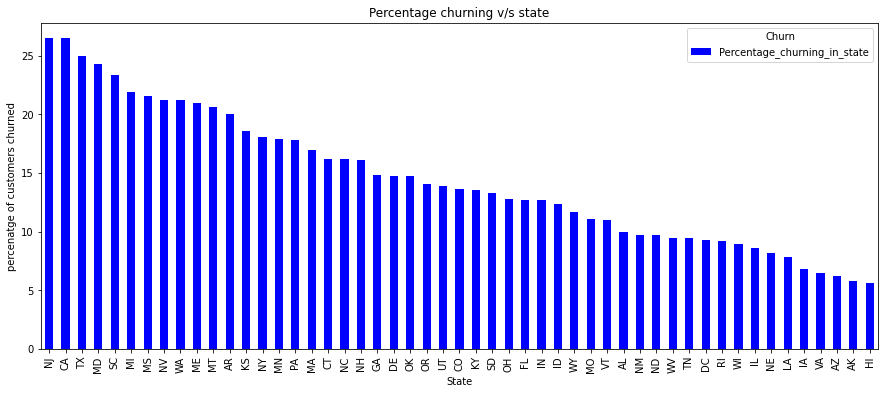

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
df_churn_state_percentage.plot(kind = 'bar',color = 'blue')
plt.ylabel("percenatge of customers churned")
plt.title("Percentage churning v/s state")

**International Plan**

In [ ]:
#calculating total number of International customers
international_plan_customers = df['International plan'].value_counts()
print(international_plan_customers)

No     3010
Yes     323
Name: International plan, dtype: int64


Text(0.5, 1.0, 'International Plan')

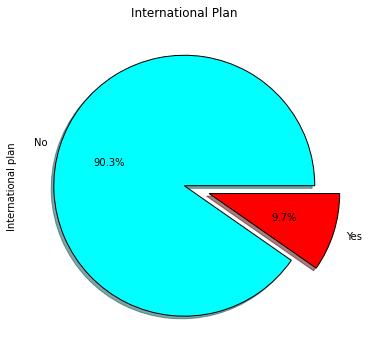

In [ ]:
international_plan_customers.plot(kind = 'pie',autopct = '%1.1f%%',wedgeprops = {'edgecolor':'black'},colors = ['cyan','red'],explode = [0,0.2],shadow = True)
plt.title("International Plan")

Only 9.7% of the customers have chosen international plan 

In [ ]:
df_international_plan = df.groupby('International plan')['Churn'].value_counts().unstack()

In [ ]:
df_international_plan['percenatge_churning'] = df_international_plan.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)
df_international_plan

Churn,False,True,percenatge_churning
International plan,,,
No,2664,346,11.495017
Yes,186,137,42.414861


Customers who has subscribed to international plan have a churning of 42%, on the the other hand Customers who have no international plan have only 11% churning.

Text(0.5, 1.0, 'churn v/s international plan')

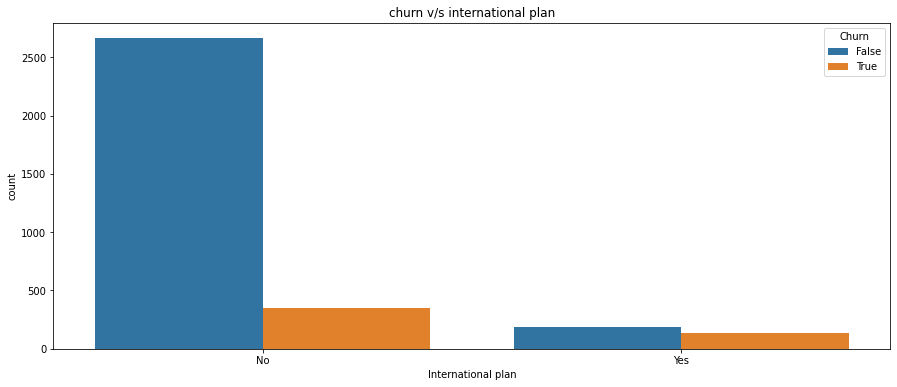

In [ ]:
sns.countplot(x = 'International plan',hue = 'Churn',data = df)
plt.title("churn v/s international plan")

This indicates that customers having international plan has very high churning percentage when compared with customers having domestic plan

In [ ]:
df[(df['International plan']=='No') & (df['Total intl calls']!=0)].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False


This indicates that people who do not have international plan can also make international calls 

*Total Intl Mins*

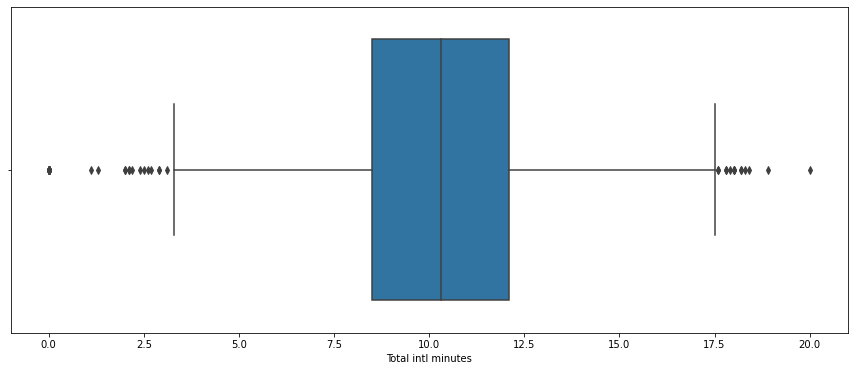

In [ ]:
sns.boxplot(x = 'Total intl minutes',data = df)

In [ ]:
np.percentile(df['Total intl minutes'],75)

12.1

In [ ]:
np.percentile(df['Total intl minutes'],25)

8.5

In [ ]:
mean_Total_intl_minutes = df['Total intl minutes'].mean()
print(mean_Total_intl_minutes)

10.237293729372938


In [ ]:
df6 = df.loc[:,['Total intl minutes','Churn']]
df6.head()

,Total intl minutes,Churn
0,10.0,False
1,13.7,False
2,12.2,False
3,6.6,False
4,10.1,False


In [ ]:
df6[df6['Total intl minutes']<=0]   # checking for any outlier value and to find people who did not place any international calls

,Total intl minutes,Churn
179,0.0,False
343,0.0,False
488,0.0,False
595,0.0,False
712,0.0,False
878,0.0,False
1028,0.0,False
1080,0.0,False
1400,0.0,False
1564,0.0,False


In [ ]:
df6['Total intl minutes'].max()

20.0

In [ ]:
df6['Total intl minutes category'] = pd.cut(df6['Total intl minutes'],bins = [-1,0,5,10,15,20],labels = ['0','1-5','6-10','11-15','16-20'])
df6.head()

,Total intl minutes,Churn,Total intl minutes category
0,10.0,False,6-10
1,13.7,False,11-15
2,12.2,False,11-15
3,6.6,False,6-10
4,10.1,False,11-15


In [ ]:
df6_total_intl_minutes = df6.groupby('Total intl minutes category')['Churn'].value_counts().unstack()
df6_total_intl_minutes

Churn,False,True
Total intl minutes category,,
0,18.0,NaN
1-5,81.0,11.0
6-10,1242.0,189.0
11-15,1410.0,259.0
16-20,99.0,24.0


In [ ]:
df6_total_intl_minutes.fillna(0,inplace = True)
df6_total_intl_minutes

Churn,False,True
Total intl minutes category,,
0,18.0,0.0
1-5,81.0,11.0
6-10,1242.0,189.0
11-15,1410.0,259.0
16-20,99.0,24.0


In [ ]:
df6_total_intl_minutes['Percentage churning'] = df6_total_intl_minutes.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
df6_total_intl_minutes

Churn,False,True,Percentage churning
Total intl minutes category,,,
0,18.0,0.0,0.000000
1-5,81.0,11.0,11.956522
6-10,1242.0,189.0,13.207547
11-15,1410.0,259.0,15.518274
16-20,99.0,24.0,19.512195


Text(0.5, 1.0, 'Percentage churning v/s Total intl minutes category')

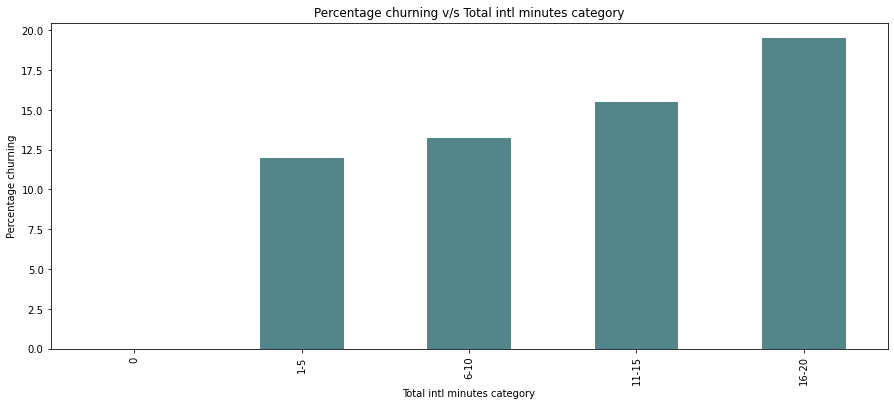

In [ ]:
df6_total_intl_minutes['Percentage churning'].plot(kind = 'bar',color = '#53868B')
plt.ylabel('Percentage churning')
plt.title('Percentage churning v/s Total intl minutes category')

The churning percentage is found to have an increase in trend with increase in total international minutes

*Total Intl Calls*

In [ ]:
df3 = df.loc[:,['Total intl calls','Churn']]
df3.head()

,Total intl calls,Churn
0,3,False
1,3,False
2,5,False
3,7,False
4,3,False


In [ ]:
df3['Total intl calls'].value_counts().sort_values()

17      1
19      1
20      1
16      2
18      3
14      6
15      7
13     14
12     15
0      18
11     28
10     50
9     109
8     116
1     160
7     218
6     336
5     472
2     489
4     619
3     668
Name: Total intl calls, dtype: int64

In [ ]:
df3['Total intl calls'].max()

20

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


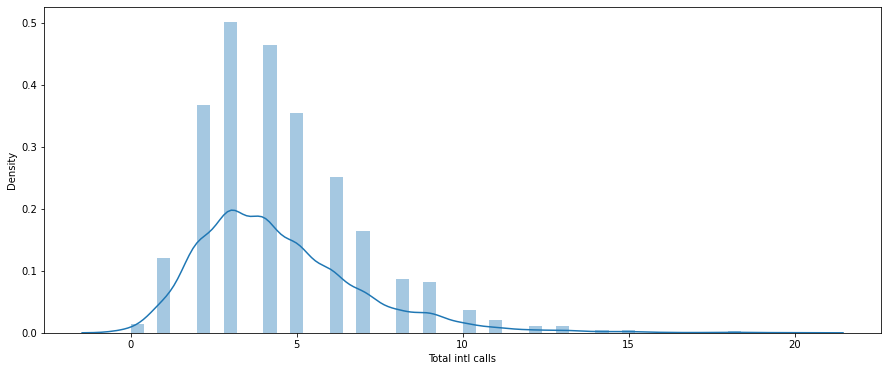

In [ ]:
sns.distplot(df['Total intl calls'])

In [ ]:
df3['intl calls category'] = pd.cut(df3['Total intl calls'],bins = [-1,0,3,6,9,14,20],labels = ['0','1-3','4-6','7-9','10-14','15-20'])
df3.head()

,Total intl calls,Churn,intl calls category
0,3,False,1-3
1,3,False,1-3
2,5,False,4-6
3,7,False,7-9
4,3,False,1-3


In [ ]:
df3_intl_calls = df3.groupby('intl calls category')['Churn'].value_counts().unstack()
df3_intl_calls

Churn,False,True
intl calls category,,
0,18.0,NaN
1-3,1080.0,237.0
4-6,1252.0,175.0
7-9,391.0,52.0
10-14,98.0,15.0
15-20,11.0,4.0


In [ ]:
df3_intl_calls.fillna(0,inplace = True)
df3_intl_calls

Churn,False,True
intl calls category,,
0,18.0,0.0
1-3,1080.0,237.0
4-6,1252.0,175.0
7-9,391.0,52.0
10-14,98.0,15.0
15-20,11.0,4.0


In [ ]:
df3_intl_calls['Percentage churning'] = df3_intl_calls.apply(lambda x: x[1]*100/(x[0]+x[1]),axis = 1)
df3_intl_calls

Churn,False,True,Percentage churning
intl calls category,,,
0,18.0,0.0,0.000000
1-3,1080.0,237.0,17.995444
4-6,1252.0,175.0,12.263490
7-9,391.0,52.0,11.738149
10-14,98.0,15.0,13.274336
15-20,11.0,4.0,26.666667


Text(0.5, 1.0, 'intl calls category v/s percentage churning')

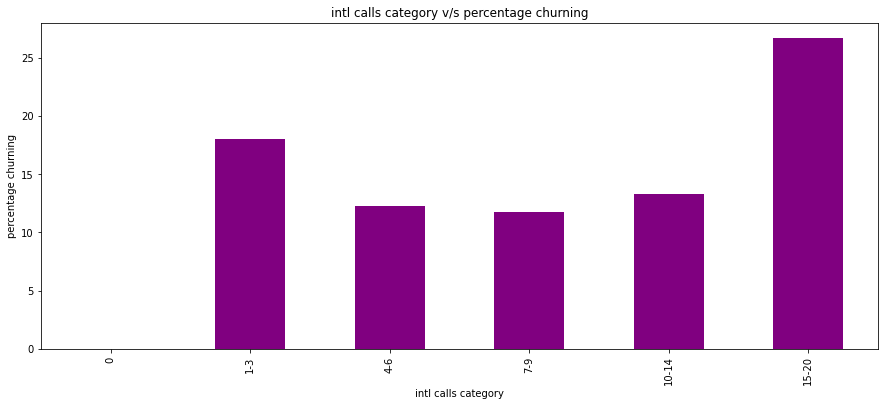

In [ ]:
df3_intl_calls['Percentage churning'].plot(kind = 'bar',color = 'purple')
plt.ylabel('percentage churning')
plt.title('intl calls category v/s percentage churning')

In [ ]:
df_intl = df[df['Total intl calls']!=0]

In [ ]:
df_intl['Total intl rate'] = df_intl.apply(lambda x: x['Total intl minutes']/x['Total intl charge'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_intl.groupby('International plan')['Total intl rate'].mean().reset_index()

,International plan,Total intl rate
0,No,3.702907
1,Yes,3.703183


The total intl rate was same irrespective of whether customer has international plan or not

**Customer Service Calls**

In [ ]:
df['Customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [ ]:
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density distribution plot of customer service calls')

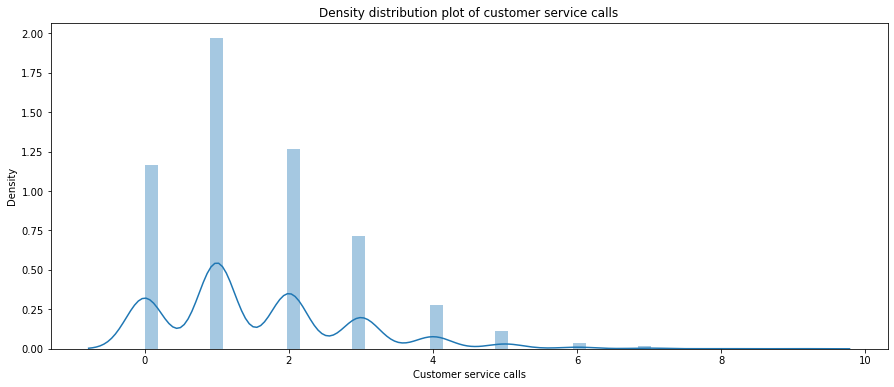

In [ ]:
sns.distplot(df['Customer service calls'],hist=True)
plt.title('Density distribution plot of customer service calls')

In [ ]:
df_customer_service_calls = df.groupby('Customer service calls')['Churn'].value_counts().unstack()
df_customer_service_calls

Churn,False,True
Customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [ ]:
df_customer_service_calls.fillna(0,inplace = True)
df_customer_service_calls

Churn,False,True
Customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [ ]:
df_customer_service_calls['percentage_churning_customer_service_calls'] = df_customer_service_calls.apply(lambda x: x[1]*100/(x[1]+x[0]), axis=1)
df_customer_service_calls

Churn,False,True,percentage_churning_customer_service_calls
Customer service calls,,,
0,605.0,92.0,13.199426
1,1059.0,122.0,10.330229
2,672.0,87.0,11.462451
3,385.0,44.0,10.256410
4,90.0,76.0,45.783133
5,26.0,40.0,60.606061
6,8.0,14.0,63.636364
7,4.0,5.0,55.555556
8,1.0,1.0,50.000000


Text(0, 0.5, 'churning percentage')

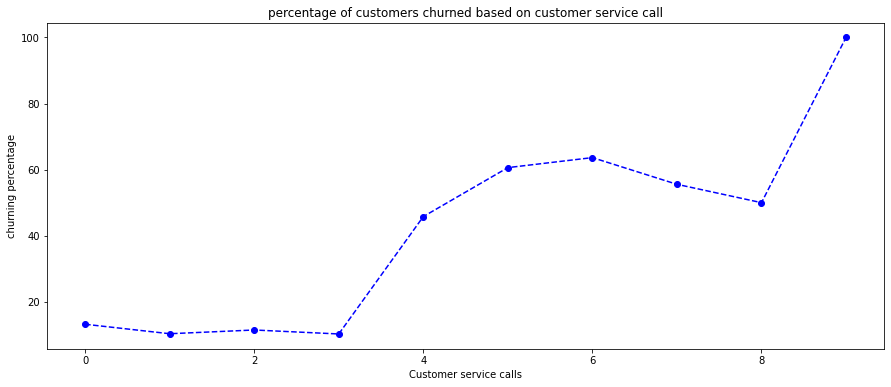

In [ ]:
df_customer_service_calls['percentage_churning_customer_service_calls'].plot(color = 'blue',linestyle = '--',marker = 'o')
plt.title("percentage of customers churned based on customer service call")
plt.ylabel("churning percentage")

Once the Customer Service Calls becomes greater than 3, the percentage of churning increases to more than 45%

**Area Code**

In [ ]:
df['Area code'].unique()

array([415, 408, 510])

In [ ]:
df_areacode = df.groupby('Area code')['Churn'].value_counts().unstack()
df_areacode

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


Text(0.5, 1.0, 'churn variation with area code')

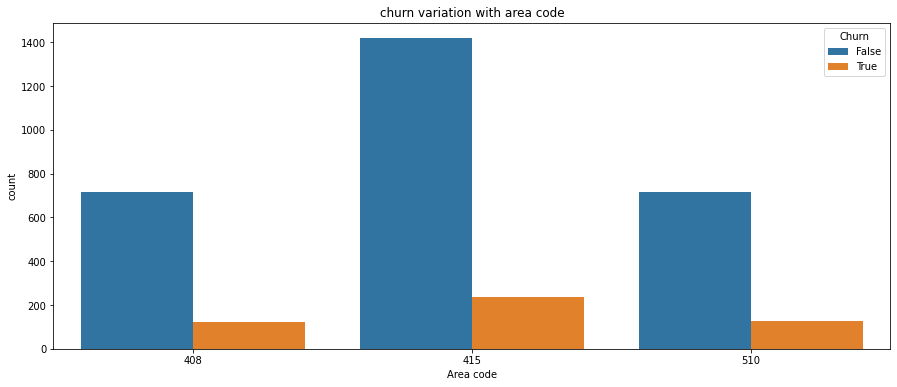

In [ ]:
sns.countplot(x = 'Area code',hue='Churn',data = df)
plt.title('churn variation with area code')

In [ ]:
df_areacode['percentage_churn_areacode'] = df_areacode.apply(lambda x: x[1]/(x[1]+x[0]) * 100,axis=1)
df_areacode

Churn,False,True,percentage_churn_areacode
Area code,,,
408,716,122,14.558473
415,1419,236,14.259819
510,715,125,14.880952


It is difficult to infer the relationship between percentage of people churned in differnt area codes as the percentage churning is almost same for the three area codes given

**Account Length**

In [ ]:
df['Account length'].nunique()

212

In [ ]:
df['Account length'].max()

243

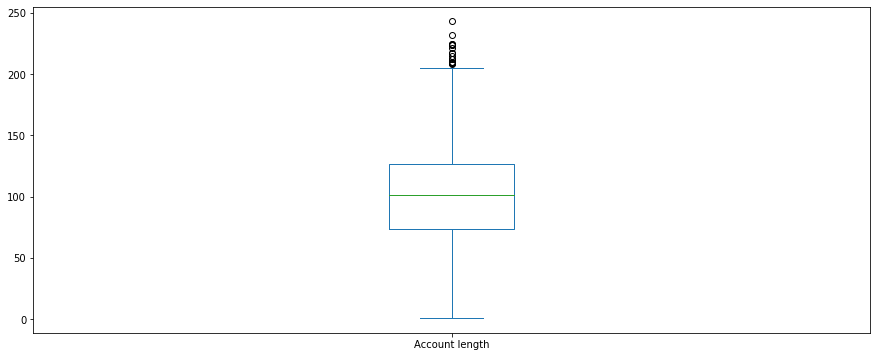

In [ ]:
df['Account length'].plot(kind = 'box')

In [ ]:
upper_quartile_account_length = np.percentile(df['Account length'],75)
lower_quartile_account_length = np.percentile(df['Account length'],25)
median_account_length = np.median(df['Account length'])
IQR_account_length = upper_quartile_account_length - lower_quartile_account_length
print(IQR_account_length)
print(median_account_length)
print(upper_quartile_account_length)
print(lower_quartile_account_length)


53.0
101.0
127.0
74.0


In [ ]:
df1 = df.loc[:,['Account length','Churn']]
df1.head()

,Account length,Churn
0,128,False
1,107,False
2,137,False
3,84,False
4,75,False


In [ ]:
df1['Account length category'] = pd.cut(df1['Account length'],bins = [0,50,100,150,200,250],labels = ['0-50','50-100','100-150','150-200','200-250'])
df1.head()

,Account length,Churn,Account length category
0,128,False,100-150
1,107,False,100-150
2,137,False,100-150
3,84,False,50-100
4,75,False,50-100


Text(0.5, 1.0, 'churn variation for different account length categories')

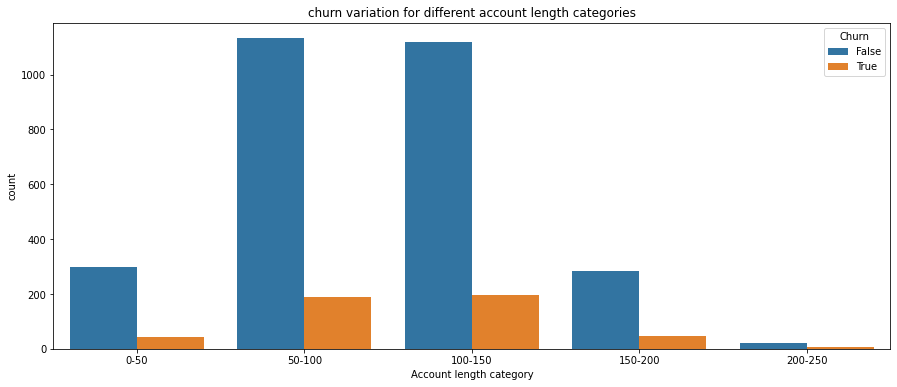

In [ ]:
sns.countplot(x= 'Account length category',hue = 'Churn',data = df1)
plt.title('churn variation for different account length categories')

In [ ]:
df1_account_length = df1.groupby('Account length category')['Churn'].value_counts().unstack()
df1_account_length

Churn,False,True
Account length category,,
0-50,297,44
50-100,1133,190
100-150,1118,195
150-200,282,48
200-250,20,6


The maximum no of people who have churned based on account length category are from 100-150

In [ ]:
df1_account_length['Percentage churning'] = df1_account_length.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
df1_account_length

Churn,False,True,Percenatge churning,Percentage churning
Account length category,,,,
0-50,297,44,12.903226,12.903226
50-100,1133,190,14.361300,14.361300
100-150,1118,195,14.851485,14.851485
150-200,282,48,14.545455,14.545455
200-250,20,6,23.076923,23.076923


Here, we got the maximum churning percentage for account length category of 200-250.